In [ ]:
#to separate images in to real and fake
import os
import shutil

input_dir = "E:/Internshp/fake/images_from_video_big"
output_dir_real = "E:/Internshp/fake/test_dir/real"
output_dir_fake = "E:\Internshp/fake/test_dir/fake"

for filename in os.listdir(input_dir):
    if filename.endswith('0.jpg'):
        # real image
        shutil.copy(os.path.join(input_dir, filename), output_dir_real)
    elif filename.endswith('1.jpg'):
        # fake image
        shutil.copy(os.path.join(input_dir, filename), output_dir_fake)


In [ ]:
#spliiting data into training(60%),validation(20%) and testing(20%)
import os
import random
import shutil

# Define the path to the folder containing all the images
data_dir = "E:/Internshp/fake/realimgs"

# Define the paths to the three new folders where you want to split the images
train_dir = "E:/Internshp/fake/train_dir"
val_dir = "E:/Internshp/fake/val_dir"
test_dir = "E:/Internshp/fake/test_dir"

# Define the percentage split for train, validation, and test datasets
train_pct = 0.6
val_pct = 0.2
test_pct = 0.2

# Get the list of all image filenames
filenames = os.listdir(data_dir)

# Shuffle the filenames randomly
random.shuffle(filenames)

# Calculate the number of images for each split
num_train = int(len(filenames) * train_pct)
num_val = int(len(filenames) * val_pct)
num_test = int(len(filenames) * test_pct)

# Split the filenames into three lists for train, validation, and test
train_filenames = filenames[:num_train]
val_filenames = filenames[num_train:num_train+num_val]
test_filenames = filenames[num_train+num_val:]

# Create the new directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Copy the images to the new directories based on their respective split
for filename in train_filenames:
    src_path = os.path.join(data_dir, filename)
    dst_path = os.path.join(train_dir, filename)
    shutil.copyfile(src_path, dst_path)

for filename in val_filenames:
    src_path = os.path.join(data_dir, filename)
    dst_path = os.path.join(val_dir, filename)
    shutil.copyfile(src_path, dst_path)

for filename in test_filenames:
    src_path = os.path.join(data_dir, filename)
    dst_path = os.path.join(test_dir, filename)
    shutil.copyfile(src_path, dst_path)


In [70]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directories for the training, validation, and test data
train_dir = "E:/Internshp/fake/train_dir"
val_dir = "E:/Internshp/fake/val_dir"
test_dir = "E:/Internshp/fake/test_dir"


In [71]:
# Define the image dimensions and batch size
height = 224
width = 224
channels = 3
batch_size = 32

In [72]:
# Define the training, validation, and test data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(height, width),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

Found 49572 images belonging to 2 classes.


In [73]:
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='binary')


Found 16523 images belonging to 2 classes.


In [74]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                   target_size=(height, width),
                                                   batch_size=batch_size,
                                                   class_mode='binary')

Found 16526 images belonging to 2 classes.


In [75]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

In [76]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [77]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3),
                               tf.keras.callbacks.ModelCheckpoint('model.h5', save_best_only=True)])


Epoch 1/10
1550/1550 [==============================] - 1585s 1s/step - loss: 0.6075 - accuracy: 0.6750 - val_loss: 0.5567 - val_accuracy: 0.7036
Epoch 2/10
1550/1550 [==============================] - 1582s 1s/step - loss: 0.5279 - accuracy: 0.7258 - val_loss: 0.5856 - val_accuracy: 0.6973
Epoch 3/10
1550/1550 [==============================] - 1542s 995ms/step - loss: 0.4507 - accuracy: 0.7771 - val_loss: 0.4781 - val_accuracy: 0.7642
Epoch 4/10
1550/1550 [==============================] - 1532s 988ms/step - loss: 0.3390 - accuracy: 0.8445 - val_loss: 0.5187 - val_accuracy: 0.7598
Epoch 5/10
1550/1550 [==============================] - 1559s 1s/step - loss: 0.2070 - accuracy: 0.9132 - val_loss: 0.5865 - val_accuracy: 0.7707
Epoch 6/10
1550/1550 [==============================] - 1552s 1s/step - loss: 0.1104 - accuracy: 0.9575 - val_loss: 0.7232 - val_accuracy: 0.7869


In [78]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

517/517 [==============================] - 159s 307ms/step - loss: 0.7285 - accuracy: 0.7828
Test accuracy: 0.7827665209770203


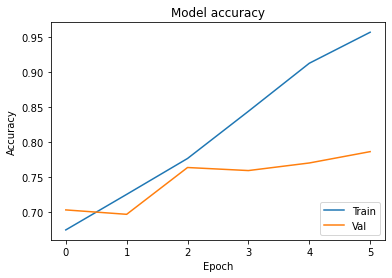

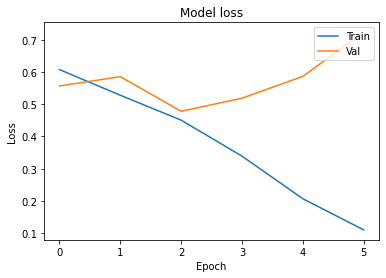

In [81]:
import matplotlib.pyplot as plt



# Plot the training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Plot the training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
